In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import librosa

In [145]:
# Load the dataset
data = pd.read_csv("/content/Dataset_Parkinson_Disease_Detection_SIP_Project_Group11.csv")

In [146]:
import librosa
import pandas as pd

def extract_features(row, sr=1000, n_mfcc=13, dct_type=2, norm='ortho', lifter=0, hop_length=512, n_fft=1024, win_length=400, window='hann'):
    numeric_values = row.astype(float).values
    mfccs = librosa.feature.mfcc(y=numeric_values, sr=sr, n_mfcc=n_mfcc, dct_type=dct_type, norm=norm, lifter=lifter, hop_length=hop_length, n_fft=n_fft, win_length=win_length, window=window)

    # Initialize an empty dictionary to store features
    features = {}

    # Iterate over the range of n_mfcc
    for i in range(mfccs.shape[0]):
        features[f"mfcc{i+1}_min"] = mfccs[i, :].min()
        features[f"mfcc{i+1}_max"] = mfccs[i, :].max()
        features[f"mfcc{i+1}_std"] = mfccs[i, :].std()
        features[f"mfcc{i+1}_var"] = mfccs[i, :].var()

    return pd.Series(features)


In [147]:
# Apply feature extraction to numeric columns (excluding "status")
numeric_columns = data.select_dtypes(include=[float, int]).columns
features = data[numeric_columns].apply(extract_features, axis=1)

# Combine features with the original dataset
data = pd.concat([data, features], axis=1)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=23
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=23
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=23
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=23
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=23
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=23
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWa

In [148]:
# Identify features and target variable
X = data.drop(["status"], axis=1)
y = data["status"]

In [149]:
# Exclude non-numeric columns
X_numeric = X.select_dtypes(include=[float, int])

In [150]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Choose a model with custom parameters
model = SVC(
    C=1.0,                # Regularization parameter
    kernel='rbf',         # Kernel type ('linear', 'poly', 'rbf', 'sigmoid', etc.)
    gamma='scale',        # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    random_state=42
)
# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

In [158]:
def print_patient_counts(y):
    healthy_count = y.value_counts()[0]
    parkinson_count = y.value_counts()[1]

    print(f"Total Healthy Patients: {int(healthy_count/6)}")
    print(f"Total Parkinson's Patients: {int(parkinson_count/6)}")

# Print total number of healthy and Parkinson's patients in the dataset
print_patient_counts(y)

Total Healthy Patients: 8
Total Parkinson's Patients: 24


In [152]:
accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = "{:.2f}".format(accuracy * 100)
print(f"Accuracy: {formatted_accuracy}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 87.18%
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



In [153]:
!pip install scikit-plot

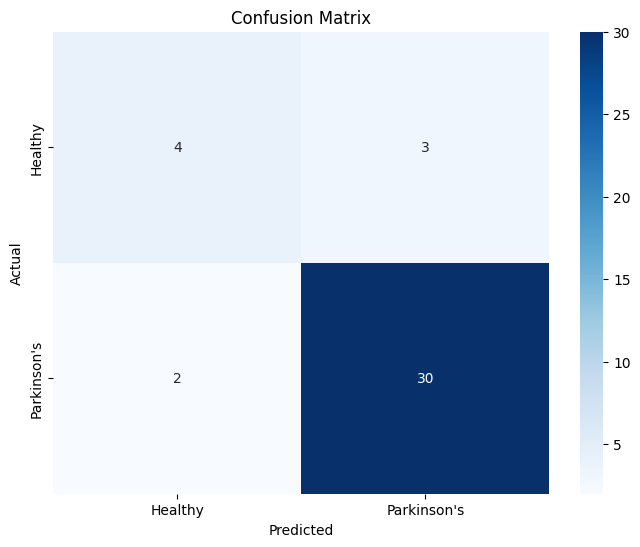

In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Healthy", "Parkinson's"], yticklabels=["Healthy", "Parkinson's"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [142]:
!pip install mlxtend

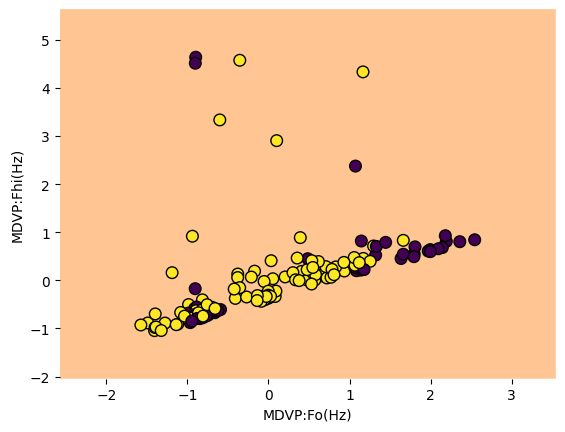

In [161]:
import numpy as np
from mlxtend.plotting import plot_decision_regions

def plot_svm_decision_boundary(X, y, model, scaler):
    # Transform the features using the provided scaler
    X_scaled = scaler.transform(X)

    # Convert y to a NumPy array
    y_array = np.array(y)

    # Plot decision boundary using all features
    plot_decision_regions(X_scaled, y_array, clf=model, legend=2, filler_feature_values={i: 0 for i in range(X_scaled.shape[1])})

    # Labeling the axes
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    # Adding markers for the training data samples
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_array, cmap='viridis', marker='o', edgecolor='k', s=70)

    # Display the plot
    plt.show()

# Plot the SVM decision boundary
plot_svm_decision_boundary(X_train, y_train, model, scaler)
